# Assignment 1
#### Kapil R Shenvi Pause
#### MCS202004

In [1]:
import nltk
import glob, os
import json
import string
from langdetect import detect
import re
from nltk.corpus import stopwords
import tqdm

# Converting from json to txt

In [2]:
def remove_non_ascii_and_lower_case(text):
    '''
    Converts to lower case and then removes the non ascii characters
    '''
    return ''.join(filter(lambda x: x in string.printable, text.lower()))

def extract_text(filename):
    '''
    Extract the text from the file name (json file) and
    index the content from paper_id, title, abstract and body_text fields
    Retuns - if output_as_list = True
                list of all the above values,
             else
                text of title, abstract and bodt_text
    '''

    file = open(filename)
    body_text = ""
    abstract = ""
    title = ""
    paper_id = ""

    paper_content = json.load(file)

    #get the paper_id
    if 'paper_id' in paper_content:
        paper_id = paper_content['paper_id']
    #get the title, if available
    if 'title' in paper_content['metadata']:
        title = paper_content['metadata']['title']
    #get abstract.text, if available
    if 'abstract' in paper_content:
        for abs in paper_content['abstract']:
            abstract = abstract + abs['text']
    if 'body_text' in paper_content:
        for bt in paper_content['body_text']:
            body_text = body_text + bt['text']
    return remove_non_ascii_and_lower_case(title + '.' + abstract + '.' + body_text + '.')



In [ ]:
save_here='text_data'
i=0
non_english=0
for file in os.listdir('data\\archive\\pdf_json'):
    i+=1
    if file.endswith('.json'):
        text=extract_text(f'data\\archive\\pdf_json\\{file}')
        #include only english texts
        try:
            lang=detect(text)
        except:
            continue
        if lang=='en':
            with open(save_here+'\\'+file+'.txt','w') as f:
                f.write(text)
        else:
            non_english+=1

In [59]:
print('number of non english documents is',non_english)

number of non english documents is 4576


# Preprocessing steps and reasons for choosing them
1. **Remove non ascii characters.** This is done so that the data can be written into txt files.
2. **Convert to lower case.** This is a standard proprocessing step.
3. **Retain only english documents.** The data contains many non english documents and they arent needed for our purpose.
4. **Remove decimal numbers along with `.`** These can interfere with extracting sentences.
5. **Remove numbers and special characters(except `.`).** Numbers and special characters dont give much information. `.` is retained to serve as a marker for senetences.

Note that **1,2** and **3** are done while converting from json to txt. We will do the rest steps in the coming code.
### What is not done
1. **Lemmatization, stemming  and removal of stopwords.** Since we will be creating language model, this should not be done. 

In [3]:

def remove_dot_if_decimal(word):
    '''
    Removes decimal point but not '.' in sentences
    ie '3.29' becomes '329' but 'Covid19.' will remain 'Covid19.'
    '''
    return re.sub(r'(?<=\d)[.](?=\d)','',word)

def remove_numbers_and_special_char(word):
    '''
    Removes numbers and special characters except '.'
    ie 'iam@"kapil_pause."' will become 'iamkapilpause.'.
    '''
    return re.sub(r'[^a-z.]','',word)


def process(word):
    '''
    preprocess the word 
    '''
    word=remove_dot_if_decimal(word)
    return remove_numbers_and_special_char(word)

In [5]:
def all_words(string):
    '''
    returns the list of all words in the string
    '''
    return re.findall(r'\w+',string)

def all_senetences(string):
    '''
    returns list of all sentences in the string
    '''
    return list(filter(lambda x: len(x)>1,string.split('.')))

data='text_data'
destination='processed_text'
word_count=0
sentence_count=0
vocabulary=set()
no_of_terms=[]
vocabulary_size=[]
i=0
for fname in tqdm.tqdm(os.listdir(f'{data}//')):
    i+=1
    with open(f'{data}//{fname}') as f:
        text=f.read()
    processed_text=' '.join(filter(None,(process(word) for word in text.split())))
    words=all_words(processed_text)
    vocabulary.update(words)
    word_count+=len(words)
    sentence_count+=len(all_senetences(processed_text))
    no_of_terms+=[word_count]
    vocabulary_size+=[len(vocabulary)]
    with open(f'{destination}//{fname}','w') as f:
        f.write(processed_text)


100%|██████████████████████████████████████████████████████████████████████████| 153862/153862 [27:46<00:00, 92.35it/s]


In [6]:
print('word count is',word_count)
print('Number of sentences is',sentence_count)

word count is 582342967
Number of sentences is 28350787


In [7]:
print('Vocabulary size is',len(vocabulary))

Vocabulary size is 2485750


## Heaps law graph

Text(0, 0.5, 'Vocabulary size')

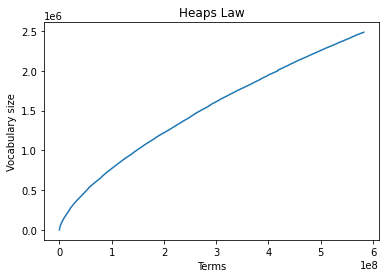

In [8]:
import matplotlib.pyplot as plt
plt.plot(no_of_terms,vocabulary_size)
plt.title("Heaps Law")
plt.xlabel('Terms')
plt.ylabel('Vocabulary size')
